In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

# 06 - Waves in Crystals, Electronic Band Structure

## Waves in Crystals

Look back at our investigation of vibrations and electronic bands in 1D.

First, lets look at the diatomic chain.

We found, by solving Newton's equations of motion, that the solutions were running waves - and for each allowed wavevector there were two allowed frequencies of oscillation:

$$
\omega_{\pm}^2 = \frac{\kappa_1 + \kappa_2}{m} \pm \frac{1}{m}\sqrt{(\kappa_1 + \kappa_2)^2 - 4 \kappa_1 \kappa_2 \text{sin}^2 (ka/2)}
$$

if we plot these 'dispersion relations' we get something like this:

<img src='phononDisp.jpg'>

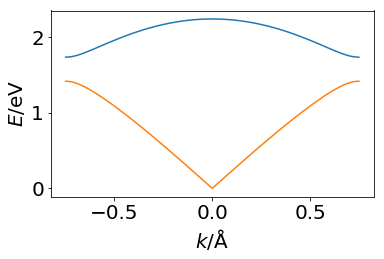

In [3]:
a = 4.21
kappa1 = 1
kappa2 = 1.5
m = 1
k = np.linspace(-np.pi/a, np.pi/a,101)
omegap = np.sqrt((kappa1+kappa2)/m + 1/m*np.sqrt((kappa1+kappa2)**2-4*kappa1*kappa2*(np.sin(k*a/2)**2))) 
omegan = np.sqrt((kappa1+kappa2)/m - 1/m*np.sqrt((kappa1+kappa2)**2-4*kappa1*kappa2*(np.sin(k*a/2)**2))) 
plt.plot(k,omegap)
plt.plot(k,omegan)
plt.xlabel(r'$k / \rm{\AA}$')
plt.ylabel(r'$E / \rm{eV}$')
plt.tight_layout()
plt.savefig('phononDisp.jpg')

If we plot out the same functions over a wider range of $k$, we get something like

<img src='phononDispAll.jpg'>

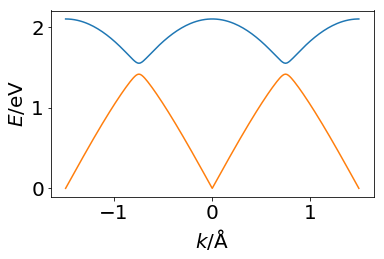

In [4]:
a = 4.21
kappa1 = 1
kappa2 = 1.2
m = 1
k = np.linspace(-2*np.pi/a, 2*np.pi/a,201)
omegap = np.sqrt((kappa1+kappa2)/m + 1/m*np.sqrt((kappa1+kappa2)**2-4*kappa1*kappa2*(np.sin(k*a/2)**2))) 
omegan = np.sqrt((kappa1+kappa2)/m - 1/m*np.sqrt((kappa1+kappa2)**2-4*kappa1*kappa2*(np.sin(k*a/2)**2))) 
plt.plot(k,omegap);
plt.plot(k,omegan);
plt.xlabel(r'$k / \rm{\AA}$')
plt.ylabel(r'$E / \rm{eV}$')
plt.tight_layout()
plt.savefig('phononDispAll.jpg')

Solutions with $k \to k + 2 \pi / a$ are physically identical. We can dispose of the duplicates and instead look at a so called extended zone scheme view

<img src='phononDispExtended.jpg'>

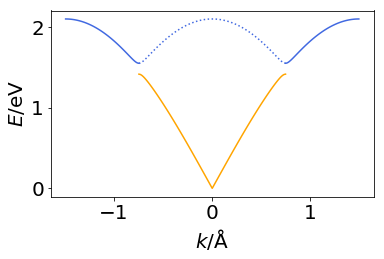

In [5]:
a = 4.21
kappa1 = 1
kappa2 = 1.2
m = 1
km = np.linspace(-np.pi/a, np.pi/a,101)
kp = np.concatenate((np.linspace(-2*np.pi/a, -np.pi/a, 100), np.linspace(np.pi/a, 2*np.pi/a, 100)),axis=0)
kmid = np.linspace(-np.pi/a, np.pi/a,101)
omegamid = np.sqrt((kappa1+kappa2)/m + 1/m*np.sqrt((kappa1+kappa2)**2-4*kappa1*kappa2*(np.sin(kmid*a/2)**2))) 
omegam = np.sqrt((kappa1+kappa2)/m - 1/m*np.sqrt((kappa1+kappa2)**2-4*kappa1*kappa2*(np.sin(km*a/2)**2))) 
omegap = np.sqrt((kappa1+kappa2)/m + 1/m*np.sqrt((kappa1+kappa2)**2-4*kappa1*kappa2*(np.sin(kp*a/2)**2))) 

plt.plot(kp[0:100],omegap[0:100],color='royalblue');
plt.plot(kp[100:201],omegap[100:201],color='royalblue');
plt.plot(km,omegam, color='orange');
plt.plot(kmid,omegamid, color='royalblue', linestyle='dotted');
plt.xlabel(r'$k / \rm{\AA}$')
plt.ylabel(r'$E / \rm{eV}$')
plt.tight_layout()
plt.savefig('phononDispExtended.jpg')

## Number of states

If we go back to the diatomic chain and look at the two branches within the range $-\pi/a \leq k \lt \pi/a$

<img src='phononDisp.jpg'>

we found that there would be $N$ states in each branch, when our chain was made of $N$ unit cells, so $2N$ atoms.

This quantization of levels comes about because of the periodic boundary conditions.

Now, because of the periodic symmetry of our system (all the atoms are the same), we can argue that

\begin{align}
k \to k + 2 \pi / a 
\end{align}

should give a physically identical system. 



If we remember that we took as our vibrational modes the guess

$$
\delta x_n = Ae^{i \omega t - ikx_n^{eq}} = Ae^{i \omega t - ikna}
$$

we can see that this is true. If we look at this and argue that $\delta x_n = \delta x_{n+N}$ we get

$$
\begin{align}
\delta x_n  = Ae^{i \omega t - ikx_n^{eq}} = Ae^{i \omega t - ikna}
          & = \delta x_{N+n} = Ae^{i \omega t - ikx_{n+N}^{eq}} = Ae^{i \omega t - ik(n+N)a}
\end{align}
$$


Further, as we have $N$ sites, to get physically identical solutions we require that $k = \frac{2 \pi m} { N a }, m = 0, \pm 1, \pm 2 \ldots, \pm\frac{N-1}{2}, -\frac{N}{2}$. 

With this restriction we have $2N$ normal modes from our $2N$ atoms that each have 1 degree of freedom. 

If we had $N_atom$ atoms in our unit cell, we would actually get $N_{atom}$ normal modes, and in 3D, $3 N_{atom}$ 

### Sound waves

Sound waves correspond to very long wavelength oscillations - which means very small wave vector. 

Again we make a small angle expansion to get

$$
\omega = 2 \sqrt {\frac{\kappa}{m}} |\text{sin}(ka/2)| \approx 2 \sqrt {\frac{\kappa}{m}}|ka/2| = \sqrt {\frac{\kappa}{m}} a |k|
$$

(and phase velocity, which equals group velocity in this case when the dispersion is linear,

$$
\nu = \omega / |k| = \sqrt{\frac{\kappa}{m}}a
$$
)

This give the speed of sound waves in our 1D crystal.

If we replace $k$ in 1D with $\textbf{k}$ in 3D, there will be different speeds in different directions for some materials.

### Thermal Expansion

We took a harmonic model for interaction between our atoms.

To understand thermal expansion this is not adequate, to appreciate this we need to look at out potential energy curve, and how it compares to a harmonic one.

<img src='../lecture_3/binding_curve.png'>

The curve is assymmetric. As temperature increases, the atoms will wander further to the right (long distance between atoms) than to the left (where repulsive interaction become very strong, very quickly).

This means that the average position of an atom $\left< x_n \right>$ will get larger, as temperature increases.

If we replace $k$ in 1D with $\textbf{k}$ in 3D, there will be different expansions and elasticity in different directions for some materials.

 ### 1D tight binding
 
 These arguments about counting the number of states hold essentially without change to the 1D tight binding model.
 
 From $N$ atoms, each with one atomic basis function, we get $N$ states dispersed in energy as $k$ changes.
 
In this case the states can accept 2 electrons each, due to Fermi-Dirac statistics applying to electrons because of the Fermionic character.

$$
E = (\epsilon + V_0) - 2t \textrm{cos}(ka) 
$$

<img src='bandDisp.jpg'>

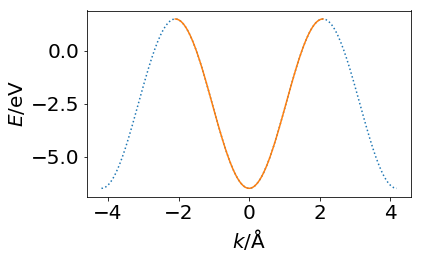

In [6]:
a = 1.5
epsilon = -2.0
V_0 = -0.5
t = 2
k = np.linspace(-np.pi/a, np.pi/a,101)
E = epsilon + V_0 - 2*t*np.cos(k*a)


kbig = np.linspace(-2*np.pi/a, 2*np.pi/a,201)
Ebig = epsilon + V_0 - 2*t*np.cos(kbig*a)
plt.plot(kbig,Ebig, linestyle='dotted');
plt.plot(k,E);
plt.xlabel(r'$k / \rm{\AA}$')
plt.ylabel(r'$E / \rm{eV}$')
plt.tight_layout()
plt.savefig('bandDisp.jpg')

### Brillouin zone is a primitive unit cell of the reciprocal lattice

We saw that we only had distinct solutions to the 1D case in the $k$ range $-\pi/a \leq k \lt \pi/a$. Very similar arguments hold in 3D.

Equivalently to the 1D case, physical waves are unchanged by the addition of any reciprocal lattice vector $\mathbf{k} \to \mathbf{k}  + \mathbf{G}$.

The equivalent in 3D to only plotting the solutions in the range $-2 \pi / a \leq k \lt 2 \pi /a$ is to only work within ranges in the first Billouin zone.

We define the Brillouin zone like this: 

<div style="background-color:Gold; margin-left: 20px; margin-right: 20px; padding-bottom: 8px; padding-left: 8px; padding-right: 8px; padding-top: 8px; border-radius: 25px;">

Start with reciprocal lattice point $\mathbf{G} = 0$. Then all k-points that are closer to $\mathbf{G} = 0$ than any other reciprocal lattice point are in the first Brilluoin zone.

</div>

Easier to see in 2D

<img src='https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcRODeysbP8NGmfCsckq_NmyeDN5cOdKKcxOd1tA9wC1vbqV3mHf'>

<img src='http://pubs.rsc.org/services/images/RSCpubs.ePlatform.Service.FreeContent.ImageService.svc/ImageService/Articleimage/2010/CP/c003524f/c003524f-f1.gif'>


When we go to 3D it can be quite complicated

<img src='https://inspirehep.net/record/1278209/files/Fig1.png'>


## Band structures

There is, unfortunately, a whole language and notation for dealing with the reciprocal lattice. In particular for particular lattices, there are a list of 'special' k-points that get labelled things like $X, L$ and directions linking points $\Lambda, \Sigma$ ... You only need to know of their existance, and the reason for using them.

We want to be able to visualise the dispersion relations of the bands - how the energy levels change with $k$. We do this by calculating the energy levels at particular k-points that follow a path through the primitive cell of the reciprocal lattice

<img src='https://image.slidesharecdn.com/freeelectroninmetal-150916165755-lva1-app6891/95/free-electron-inmetal-62-638.jpg?cb=1442422825'  style='width:400px'>



<img src='https://image.slidesharecdn.com/freeelectroninmetal-150916165755-lva1-app6891/95/free-electron-inmetal-62-638.jpg?cb=1442422825' style='width:400px'>

Along a given direction we get something that often looks rather to our 1D tightbinding chain - look at the $\Gamma$-point, which is what the $\mathbf{G} = 0$ point is called conventionally. As it moves to the left, towards the $L$ point, it traces out something that looks almost identical to the tight binding model.

Now, however, we many bands at each k-point. These occur because there are many atomic orbitals on each atom in a real system.

The basic rules still apply though. Within the a Brillouin Zone the will be as many k-states as there are unit cells in our system. And the states are filled up to the fermi-energy.


## Effective Mass

The dispersion relation for electrons in an s-type band
$$
E = (\epsilon + V_0) - 2t \textrm{cos}(ka) 
$$
can be approximately written as
$$
E = E_0 + \frac{\hbar^2 k^2}{2m^*}
$$
at both the bottom of the band, and at the top of the band.

For small angles $\cos(ka) \approx 1 - \frac{(ka)^2}{2}$ so
 
$$
E \approx (\epsilon + V_0 - 2t ) + t(ka)^2
$$

which is of the form required if $m^* = \frac{\hbar^2}{2ta^2}$.


Or around $k = \pi/a$ we expand the cosine around $\pi$ to get
$$ 
-1 + \frac{(ka - \pi)^2}{2} 
$$
to get a similar result - quadratic in the shift of $k$ from $\pi/a$.

Free electron gas is simply 
$$
E = E_0 + \frac{\hbar^2 k^2}{2m}
$$
so all expressions transfer, but with $m^*$ instead.

We'll see next week that we can deal with electrons and holes in semiconductors using this terminology, and even bolt in the Drude model to get a reasonable model of processes in devices.

### Density of States

If we sum up all the states that appear in an energy window, we can flatten these 'spaghetti diagrams' into 1D, which shows where there are energy levels that electrons can occupy:

Consider a rather complicated system - graphene on Titanium Oxide.

<img src='TiO2graphene.png'   style='width:600px'>



We get a combined band structure on the right of the figure below, and if we sum up the states at given energies we get the DOS on the left:

<img src='TiO2grapheneBands.png' style='width:600px'>

This is a very complicated structure - but there are some features of interest that we might come back to. Note some 'transitions' are marked. Remember in atoms electrons can shift between energy levels when a photon of energy $\hbar \omega = \Delta E$, a similar picture holds here. When bands have energy levels at appropriate energies it may be possible to absorb light energy.

## Metals, Semiconductors, Insulators

If there is an energy gap between the highest filled states and the next set of states, then you have an insulator, or if the gap is less than about 5 eV, a semiconductor.

If there is no energy gap between empty and filled states, we have a metal.

Or in very crude cartoon forms

<img src='http://what-when-how.com/wp-content/uploads/2011/07/tmp6C267_thumb_thumb.jpg' style='width:600px'>

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Band_filling_diagram.svg/300px-Band_filling_diagram.svg.png' style='width:600px'>

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/D-band_filling.png/500px-D-band_filling.png' style='width:600px'>

# Summary

We can now start to fill in more details about how real materials work.